# Equity in post-HCT Survival Predictions





# Introduction to our project
Our project, inspired by the [Kaggle competition](https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions/overview) on post-Hematopoietic Cell Transplantation (HCT) survival predictions, aims to analyze survival outcomes for patients undergoing HCT. This procedure is vital for treating hematological diseases such as leukemia, lymphoma, and certain blood disorders. The dataset provided in the competition offers a rich source of information, enabling us to conduct an in-depth analysis to identify key factors that influence survival outcomes and address disparities in treatment results.

Through our analysis, we aim to uncover patterns and relationships between demographic, socioeconomic, and medical factors and survival rates. By identifying significant predictors and trends, we can provide actionable insights that can improve patient care and guide treatment strategies. Our analysis will also focus on equity, examining disparities in survival outcomes across different groups to highlight inequities and suggest potential interventions to mitigate them.

In addition to the analytical component, we will develop a predictive model to estimate survival probabilities for HCT patients. This model will complement the analysis by offering clinicians a practical tool for assessing patient risk and tailoring treatments accordingly. By integrating insights from our data analysis with the predictive model, we aim to provide a comprehensive approach to improving decision-making and patient outcomes.

Overall, this project balances detailed data analysis with predictive modeling to address critical questions about patient care and equity in HCT treatments. It will support healthcare providers and researchers by offering both actionable insights and practical tools to enhance the quality and fairness of treatment outcomes.

# Dataset Overview

The dataset consists of approximately 28,800 rows and 60 columns, each representing an individual patient record with a comprehensive set of features. These features span several categories, including demographics, medical history, treatment details, and outcome variables. Key variables include:


#### Demographics:
Includes features like age at HCT, ethnicity, and race group to explore the role of socioeconomic and demographic factors in survival outcomes.
#### Medical History:
Includes comorbidity scores, prior tumors, and pre-existing conditions like diabetes and cardiac issues, which can influence survival.
#### Treatment Details:
Includes treatment-related features like HLA match, graft type, and conditioning intensity, which are critical for analyzing survival probabilities.
#### Outcome Variables:
Focus on Event-Free Survival (EFS) and EFS time, representing survival status and time to an event or censoring.

This dataset is particularly suited for both survival prediction and equity-focused analyses. Key features for survival predictions include demographic, medical, and treatment variables. For equity-focused analysis, ethnicity and race are crucial for identifying disparities in outcomes.

# Exhibition of analyses



#### Distribution of Event-Free Survival Time (EFS Time)
This histogram displays the distribution of event-free survival time (EFS Time) in years across all patients in the dataset. The data is right-skewed, with most patients experiencing events within the first two years post-HCT. The events here refer to any post-op complication that they may have suffered.

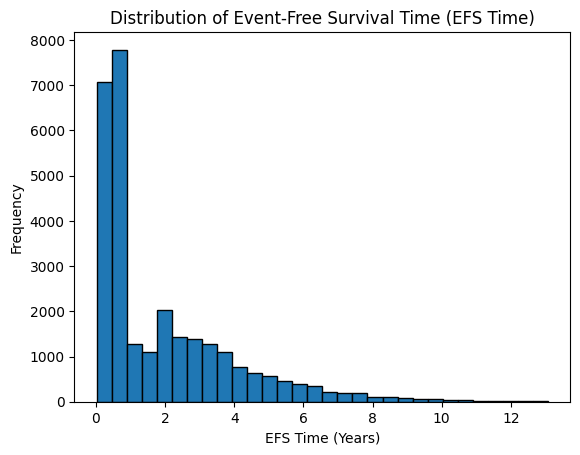

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_id = "1oCgZEJBCPQAJc9Jc2UVJtLBejSmMlR9F"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
train_df = pd.read_csv(url)

########## Convert efs_time from months to years

train_df['efs_time_years'] = train_df['efs_time'] / 12
train_df['efs_time_years'] = train_df['efs_time_years'].round(2) #Round to 2 decimal places for clarity
train_df[['efs_time', 'efs_time_years']].head() # Displaying the updated DataFrame
# Plotting a basic histogram
survival_with_events = plt.hist(train_df['efs_time_years'], bins=30, edgecolor='black')

# Adding labels and title
plt.title('Distribution of Event-Free Survival Time (EFS Time)')
plt.xlabel('EFS Time (Years)')
plt.ylabel('Frequency')

# Display the plot
plt.show()

#### Pairplot Comparing Multiple Factors with EFS Time
The pairplot examines relationships between EFS time, comorbidity scores, and HLA matching (hla_match_c_high). It highlights patterns in survival times based on these key factors, suggesting that higher comorbidity scores may correspond to shorter EFS times.

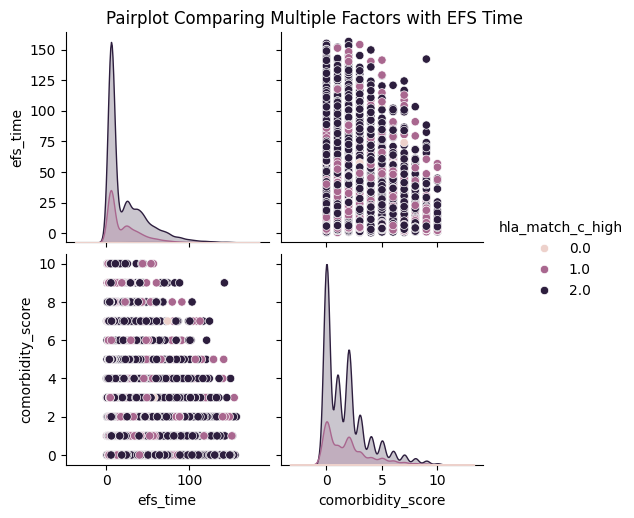

In [ ]:
sns.pairplot(train_df[['efs_time', 'comorbidity_score', 'melphalan_dose', 'hla_match_c_high']], hue='hla_match_c_high')

plt.suptitle("Pairplot Comparing Multiple Factors with EFS Time", y=1.02)
plt.show()

#### Ethnicity and Event-Free Survival Summary Table
This table summarizes the percentage of patients with event-free survival (EFS = 1) and the average survival time (EFS Time) across different ethnic groups. It reveals disparities, with "Non-residents of the U.S." having the lowest average survival time.

In [ ]:
equity_indicators = ['ethnicity', 'race_group', 'efs', 'efs_time']
equity_df = train_df[equity_indicators]
# Calculate the total count of efs for each ethnicity
total_counts = equity_df.groupby('ethnicity')['efs'].count()

# Calculate the count of events (1) and censored (0) within each ethnicity
event_counts = equity_df.groupby('ethnicity')['efs'].value_counts().unstack()

# Calculate the percentage of each category (1 or 0) relative to the total counts
percentage_efs = (event_counts.div(total_counts, axis=0) * 100).round(2).reset_index()

# Calculate the average efs_time for each ethnicity
average_efs_time = equity_df.groupby('ethnicity')['efs_time'].mean().round(2).reset_index()
average_efs_time.rename(columns={'efs_time': 'avg_efs_time'}, inplace=True)

# Merge the percentage data with the average efs_time
final_summary = pd.merge(percentage_efs, average_efs_time, on='ethnicity')

print("Final Summary with Percentage of efs and Average efs_time:")
final_summary

Final Summary with Percentage of efs and Average efs_time:


,ethnicity,0.0,1.0,avg_efs_time
0,Hispanic or Latino,50.43,49.57,22.96
1,Non-resident of the U.S.,58.07,41.93,16.09
2,Not Hispanic or Latino,45.24,54.76,23.46


#### Race and Event-Free Survival Summary Table
This table presents EFS percentages and average survival times for different racial groups. Notably, White patients exhibit the highest event-free survival percentage (62.55%), while American Indian or Alaska Native patients have the highest average EFS time (24.16 years).

In [ ]:
# Calculate the total count of efs for each race_group
total_counts = equity_df.groupby('race_group')['efs'].count()

# Calculate the count of events (1) and censored (0) within each race_group
event_counts = equity_df.groupby('race_group')['efs'].value_counts().unstack()

# Calculate the percentage of each category (1 or 0) relative to the total counts
percentage_efs = (event_counts.div(total_counts, axis=0) * 100).round(2).reset_index()

# Calculate the average efs_time for each race_group
average_efs_time = equity_df.groupby('race_group')['efs_time'].mean().round(2).reset_index()
average_efs_time.rename(columns={'efs_time': 'avg_efs_time'}, inplace=True)

# Merge the percentage data with the average efs_time
final_summary = pd.merge(percentage_efs, average_efs_time, on='race_group')

print("Final Summary with Percentage of efs and Average efs_time:")
final_summary

Final Summary with Percentage of efs and Average efs_time:


,race_group,0.0,1.0,avg_efs_time
0,American Indian or Alaska Native,48.96,51.04,24.16
1,Asian,44.85,55.15,22.63
2,Black or African-American,44.13,55.87,21.81
3,More than one race,53.42,46.58,25.91
4,Native Hawaiian or other Pacific Islander,47.65,52.35,23.07
5,White,37.45,62.55,21.83


#### Correlation Heatmap for EFS and Related Features
The heatmap highlights correlations between various features and event-free survival outcomes. Key correlations include the relationship between conditioning intensity and age, as well as associations between HLA matching and survival outcomes, which provide insights into significant predictors.

Encoding column: prior_tumor | Unique values: ['No' 'Yes' nan 'Not done']
Encoding column: hepatic_severe | Unique values: ['No' 'Yes' nan 'Not done']
Encoding column: renal_issue | Unique values: ['No' nan 'Yes' 'Not done']
Encoding column: conditioning_intensity | Unique values: [nan 'MAC' 'RIC' 'NMA' 'TBD' 'No drugs reported'
 'N/A, F(pre-TED) not submitted']
Encoding column: tce_match | Unique values: [nan 'Permissive' 'HvG non-permissive' 'Fully matched'
 'GvH non-permissive']
Encoding column: gvhd_proph | Unique values: ['FKalone' 'Other GVHD Prophylaxis' 'Cyclophosphamide alone'
 'FK+ MMF +- others' 'TDEPLETION +- other' 'CSA + MMF +- others(not FK)'
 'CSA + MTX +- others(not MMF,FK)' 'FK+ MTX +- others(not MMF)'
 'Cyclophosphamide +- others' 'CSA alone' nan 'TDEPLETION alone'
 'No GvHD Prophylaxis' 'CDselect alone' 'CDselect +- other'
 'Parent Q = yes, but no agent' 'FK+- others(not MMF,MTX)'
 'CSA +- others(not FK,MMF,MTX)']
Encoding column: melphalan_dose | Unique values: ['N

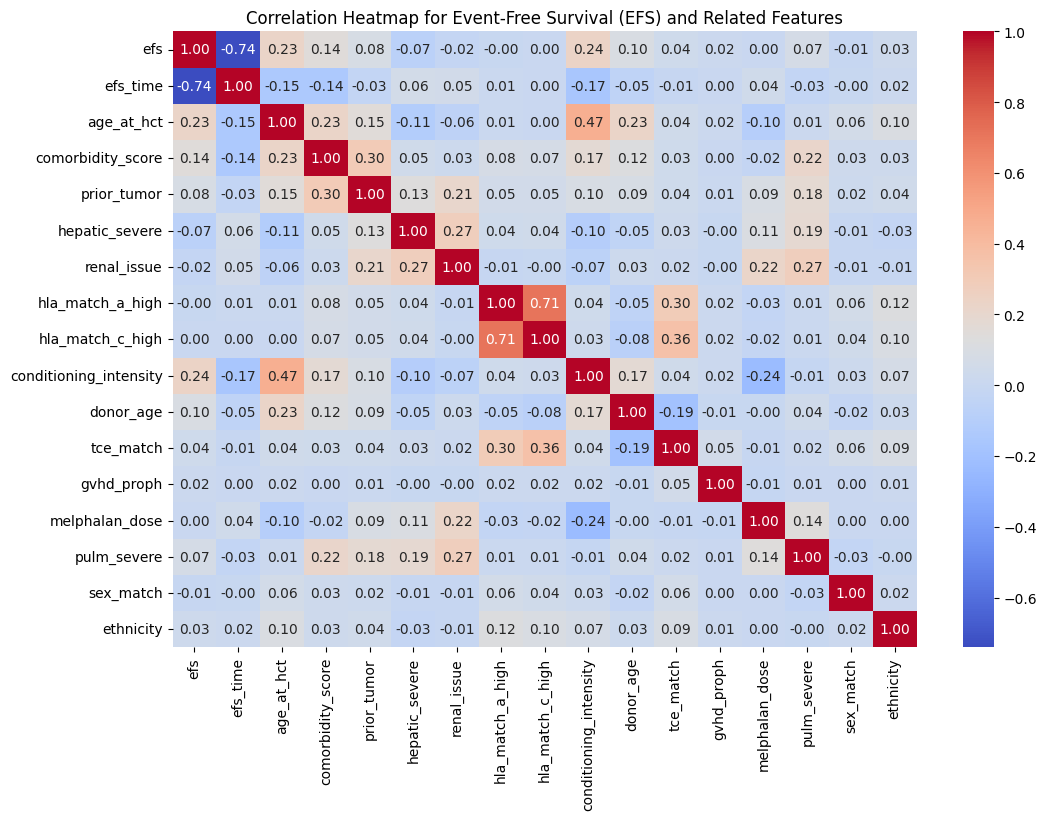

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Replace UserWarning with the specific warning category you want to suppress

# Select relevant columns for the heatmap
selected_columns = [
    'efs', 'efs_time', 'age_at_hct', 'comorbidity_score', 'prior_tumor',
    'hepatic_severe', 'renal_issue', 'hla_match_a_high', 'hla_match_c_high',
    'conditioning_intensity', 'donor_age', 'tce_match', 'gvhd_proph',
    'melphalan_dose', 'pulm_severe', 'sex_match', 'ethnicity'
]

# Filter the dataset to include only the selected columns
subset = train_df[selected_columns]

# Convert all non-numeric columns to numeric
for column in subset.columns:
    if subset[column].dtype == 'object':  # Check if column is non-numeric
        unique_values = subset[column].unique()
        print(f"Encoding column: {column} | Unique values: {unique_values}")
        if len(unique_values) == 2:  # Binary categorical variable
            subset[column] = subset[column].apply(lambda x: 1 if x == 'Yes' else 0)
        else:  # Multi-class categorical variable
            subset[column] = subset[column].astype('category').cat.codes

# Handle missing values
subset = subset.fillna(0)

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Heatmap for Event-Free Survival (EFS) and Related Features")
plt.show()


# Target Audience
**Healthcare Providers:**
Healthcare professionals like hematologists, oncologists, and transplant specialists would benefit from the predictive model as it could assist in making more informed clinical decisions, tailoring treatments to individual patients, and improving patient care based on the model’s insights into survival probabilities.

**Medical Researchers:**
Medical researchers focusing on hematology, oncology, transplant medicine, and health equity would also be an important audience. They would be interested in using the predictive model and its data analysis to uncover new insights or to inform future studies, especially those that examine survival disparities related to socioeconomic and demographic factors.

**Patients and Patient Advocacy Groups:**
Patients and patient advocacy groups, especially those focusing on blood cancers, bone marrow diseases, and stem cell transplants, would also benefit from the project. The model’s insights into the potential predictors of survival could help patients better understand their treatment options and prepare for the challenges associated with HCT, while also ensuring more equitable access to care.

**Bioinformaticians and Analysts:**
Data scientists, bioinformaticians, and healthcare analysts, who are involved in predictive modeling and data-driven healthcare insights, form another key audience. These individuals would be interested in the methods used to develop the model and how it addresses health equity, particularly in terms of fairness and bias in predictive models.

**Academic Institutions:**
Academic institutions and educators in fields like medicine, data science, bioinformatics, public health, and health policy would find this project a useful case study or teaching tool. It could help illustrate the practical applications of predictive analytics and the importance of equity-focused research in healthcare.


# Potential Application
**Clinical Decision Support:**
The predictive model can assist healthcare providers in making personalized treatment decisions for patients undergoing hematopoietic cell transplantation (HCT). By estimating survival probabilities, clinicians can tailor treatment plans to improve patient outcomes and optimize resource allocation.


**Health Equity Initiatives:**
Insights from the equity-focused analysis can help identify disparities in survival outcomes across demographic and socioeconomic groups. This information can be used to advocate for policies and interventions aimed at reducing inequities in healthcare access and outcomes.

**Research and Policy Development:** The findings from this project can inform future research on hematological diseases and HCT. Policymakers and healthcare organizations can use the insights to design programs that address systemic disparities and improve healthcare delivery.

**Benchmarking and Quality Improvement:** Hospitals and healthcare systems can use the predictive model to benchmark their outcomes against national or regional data, identifying areas for improvement in their HCT programs and overall patient care strategies.

# Limitations and Improvements
While the dataset provides valuable insights into survival outcomes for patients undergoing Hematopoietic Cell Transplantation (HCT), several limitations could impact the analysis and model performance. One major limitation is the absence of critical socioeconomic and demographic variables such as insurance status, income level, education level, and gender. These factors are key contributors to understanding disparities in healthcare access and survival outcomes, and their omission limits the ability to perform a comprehensive equity-focused analysis. Without this data, it becomes challenging to assess the full impact of socioeconomic and demographic disparities on patient survival rates.

Additionally, missing data in critical features such as cyto_score and cyto_score_detail may reduce the reliability and accuracy of the predictive model. The synthetic nature of the dataset, while protecting patient privacy, might not fully capture the complexity and variability of real-world clinical data, further limiting the applicability of the findings in real-world settings. Furthermore, the reliance on static patient data at a single point in time, such as age and medical history, restricts the model’s ability to account for dynamic changes in a patient’s health over time, which are crucial for long-term survival predictions.

To address these challenges, the inclusion of key variables like socioeconomic indicators and gender should be prioritized in future datasets to enable a more comprehensive and equitable analysis. Advanced imputation techniques can help manage missing data in critical fields, ensuring their contribution to the predictive model. Expanding the dataset to include diverse and longitudinal data would enhance both the accuracy and generalizability of the model, making it a more effective tool for clinical and equity-focused applications. By addressing these limitations, the analysis can better support actionable insights and foster improvements in both patient care and healthcare equity.


# Data Selection and Justification
For continued analysis, we have selected key variables from the dataset that align with our dual objectives of survival prediction and equity-focused insights:

Demographics (age_at_hct, ethnicity, race_group): These variables are critical for analyzing survival disparities across different racial and ethnic groups, which is essential for understanding equity in treatment outcomes. Age at HCT is also a known determinant of survival rates.

Medical History (comorbidity_score, prior_tumor, diabetes, cardiac, pulmonary): These features capture pre-existing health conditions that can significantly influence post-transplant survival outcomes. The comorbidity score, in particular, is a strong predictor of survival times.

Treatment Details (hla_match_c_high, conditioning_intensity, melphalan_dose): Treatment-related variables are crucial for understanding how specific medical decisions impact event-free survival. High-resolution HLA matching and conditioning intensity are particularly important for tailoring transplantation strategies.

Outcome Variables (efs, efs_time): These are the primary targets for our analysis. EFS captures whether the patient remained event-free, while EFS time provides a measure of how long patients survived without complications, enabling both categorical and time-based analyses.

The selection of these variables is justified by their relevance to the clinical and equity objectives of the project. Demographics and socioeconomic indicators (ethnicity, race) allow for equity-focused analysis, while medical and treatment variables provide actionable insights for improving survival predictions and tailoring patient care. This combination ensures a holistic approach to the dataset, addressing both predictive accuracy and fairness in healthcare delivery.

# Completing and Sharing Insights
Our analysis will be completed through a combination of statistical exploration, data visualization, and machine learning modeling. The analytical process will focus on understanding survival outcomes, identifying key predictive factors, and highlighting disparities across demographic groups. Statistical techniques like correlation analysis and feature importance will reveal significant variables, while survival models (e.g., Kaplan-Meier curves, Cox proportional hazards) and equity-focused analyses will provide actionable insights.

To ensure robust dissemination, the findings will be tailored to two primary audiences: healthcare professionals and policy stakeholders. For clinicians and transplant specialists, the analysis will offer insights into patient-specific risk factors and treatment effectiveness, supported by visualizations like survival curves and predictive models. This information can guide decision-making and personalized care strategies. For policymakers and healthcare equity advocates, the equity-focused analysis will highlight disparities in survival outcomes, emphasizing areas for improvement in access to and quality of care.

The results will be shared through multiple channels, including:

Academic and Medical Conferences: Presenting findings to researchers and practitioners in hematology and healthcare analytics.
Reports and Dashboards: Developing interactive dashboards for healthcare organizations to visualize survival outcomes and disparities.
Kaggle Community: Sharing the analysis as part of the competition to foster collaborative improvements and expand its impact.
By tailoring dissemination strategies to these audiences, the analysis ensures practical application in improving patient outcomes and promoting equitable healthcare practices.